---
#Overfitting - datasets: Diabetes , California Housing
---
**Machine Learning em Projetos (Erick Muzart e Fernando melo)**   
Tópicos:
- overfitting

<br>
------------------------------------------------

Este código Python carrega o dataset Diabetes, divide-o em conjuntos de treinamento e teste, e ajusta um modelo de regressão polinomial com diferentes graus de polinômio (de 1 a 5). Em seguida, calcula o erro quadrático médio para os conjuntos de treinamento e teste e plota o gráfico de erros em relação ao grau do polinômio.

Você verá que, à medida que o grau do polinômio aumenta, o erro de treinamento diminui, mas o erro de teste inicialmente diminui e depois aumenta. O aumento do erro de teste com o aumento da complexidade do modelo (grau do polinômio) é uma indicação de overfitting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



## Diabetes dataset

In [2]:
# Carregar o dataset Diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [3]:
# Create a DataFrame with the feature data
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target (dependent variable) column to the DataFrame
df['target'] = diabetes.target

# Display the first few rows of the DataFrame
print (df.shape)
df.head()

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


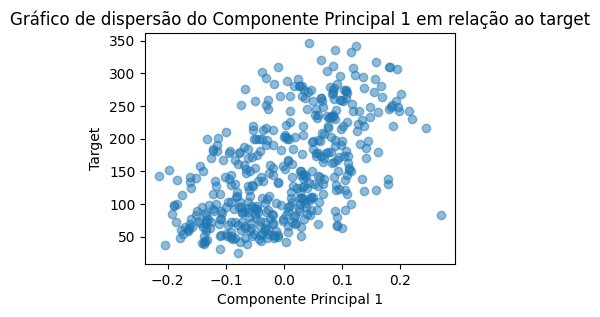

In [4]:
from sklearn.decomposition import PCA
# Aplicar o PCA às variáveis independentes
pca = PCA(n_components=1)
principal_components = pca.fit_transform(df.drop(columns=['target']))

# Adicionar o componente principal ao DataFrame
df['PC1'] = principal_components

# Plotar o gráfico de dispersão do componente principal em relação ao target
plt.figure(figsize=(4,3))
plt.scatter(df['PC1'], df['target'], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Target')
plt.title('Gráfico de dispersão do Componente Principal 1 em relação ao target')
plt.show()

In [5]:

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar listas para armazenar os erros de treinamento e teste
train_errors = []
test_errors = []



In [6]:
# Definir o intervalo de graus de polinômio a serem testados (1 a 10)
degrees = list(range(1, 6))
print('degrees=',degrees)

train_errors =[]
test_errors =[]
for degree in degrees:
    # Gerar características polinomiais
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Treinar o modelo de regressão linear
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)

    # Calcular o erro quadrático médio para os conjuntos de treinamento e teste
    y_train_pred = lr.predict(X_train_poly)
    y_test_pred = lr.predict(X_test_poly)
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)



degrees= [1, 2, 3, 4, 5]


In [7]:
print('MSE no treino =',[round(i,2) for i in train_errors])
print('MSE no teste =',[round(i,2) for i in test_errors])

MSE no treino = [2868.55, 2393.14, 3150.73, 0.0, 0.0]
MSE no teste = [2900.19, 3096.03, 88656.45, 146907.59, 143012.59]


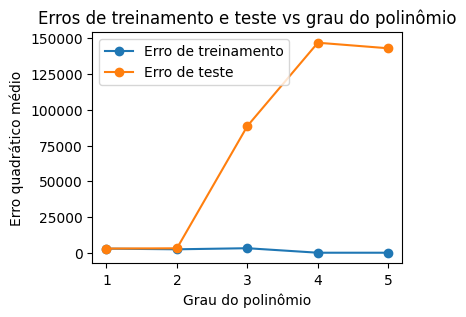

In [8]:
# Plotar o gráfico de erros vs grau do polinômio
plt.figure(figsize=(4,3))
plt.plot(degrees, train_errors, label='Erro de treinamento', marker='o')
plt.plot(degrees, test_errors, label='Erro de teste', marker='o')
plt.xlabel('Grau do polinômio')
plt.ylabel('Erro quadrático médio')
plt.legend()
plt.title('Erros de treinamento e teste vs grau do polinômio')
plt.show()


## California Housing dataset

In [9]:
from sklearn.datasets import fetch_california_housing
# Carregar o conjunto de dados California Housing
housing_data = fetch_california_housing()
X = housing_data.data
y = housing_data.target


In [10]:
# Create a DataFrame with the feature data
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)

# Add the target (dependent variable) column to the DataFrame
df['target'] = housing_data.target

# Display the first few rows of the DataFrame
print (df.shape)
df.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


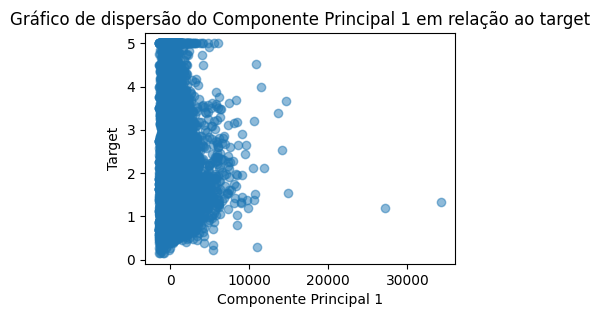

In [11]:
from sklearn.decomposition import PCA
# Aplicar o PCA às variáveis independentes
pca = PCA(n_components=1)
principal_components = pca.fit_transform(df.drop(columns=['target']))

# Adicionar o componente principal ao DataFrame
df['PC1'] = principal_components

# Plotar o gráfico de dispersão do componente principal em relação ao target
plt.figure(figsize=(4,3))
plt.scatter(df['PC1'], df['target'], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Target')
plt.title('Gráfico de dispersão do Componente Principal 1 em relação ao target')
plt.show()

In [12]:

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar listas para armazenar os erros de treinamento e teste
train_errors = []
test_errors = []



In [13]:
# Definir o intervalo de graus de polinômio a serem testados (1 a 10)
degrees = list(range(1, 6))
print('degrees=',degrees)

train_errors =[]
test_errors =[]
for degree in degrees:
    # Gerar características polinomiais
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Treinar o modelo de regressão linear
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)

    # Calcular o erro quadrático médio para os conjuntos de treinamento e teste
    y_train_pred = lr.predict(X_train_poly)
    y_test_pred = lr.predict(X_test_poly)
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)



degrees= [1, 2, 3, 4, 5]


In [14]:
print('MSE no treino =',[round(i,2) for i in train_errors])
print('MSE no teste =',[round(i,2) for i in test_errors])

MSE no treino = [0.52, 0.42, 0.34, 0.32, 0.36]
MSE no teste = [0.56, 0.46, 25.81, 1651.83, 54033.44]


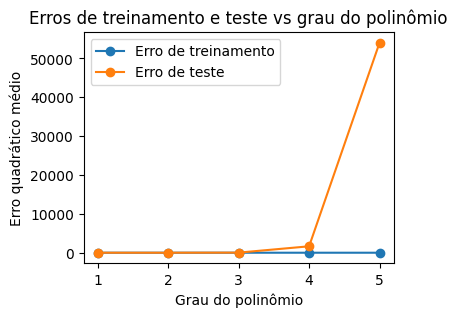

In [15]:
# Plotar o gráfico de erros vs grau do polinômio
plt.figure(figsize=(4,3))
plt.plot(degrees, train_errors, label='Erro de treinamento', marker='o')
plt.plot(degrees, test_errors, label='Erro de teste', marker='o')
plt.xlabel('Grau do polinômio')
plt.ylabel('Erro quadrático médio')
plt.legend()
plt.title('Erros de treinamento e teste vs grau do polinômio')
plt.show()
